### Project Classification


In [161]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random

In [81]:
#loading the data
df = pd.read_excel('C:/Users/REBUILD/Desktop/DataScience/churn.xlsx')

## Exploratory Data Analysis

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [84]:
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2342,3003-CMDUU,1,United States,California,Santa Paula,93060,"34.402343, -119.094824",34.402343,-119.094824,Female,...,Month-to-month,Yes,Electronic check,95.15,2395.7,No,0,52,3273,NaN
2919,6896-SRVYQ,1,United States,California,Camino,95709,"38.748316, -120.675512",38.748316,-120.675512,Male,...,Month-to-month,No,Electronic check,73.85,3122.4,No,0,48,4374,NaN
463,0516-VRYBW,1,United States,California,Stanton,90680,"33.801869, -117.995068",33.801869,-117.995068,Female,...,One year,No,Bank transfer (automatic),20.15,390.85,Yes,1,85,4931,Attitude of support person
2464,3442-ZHHCC,1,United States,California,Coarsegold,93614,"37.212191, -119.749323",37.212191,-119.749323,Male,...,One year,Yes,Credit card (automatic),76.90,5023,No,0,53,5355,NaN
6844,1591-MQJTP,1,United States,California,Long Beach,90804,"33.783047, -118.1486",33.783047,-118.148600,Male,...,One year,Yes,Bank transfer (automatic),93.65,4839.15,No,0,68,4163,NaN
3674,8884-MRNSU,1,United States,California,Caruthers,93609,"36.5276, -119.865999",36.527600,-119.865999,Male,...,One year,No,Bank transfer (automatic),19.90,329.75,No,0,63,3526,NaN
6905,5916-QEWPT,1,United States,California,Valley Village,91607,"34.165783, -118.399795",34.165783,-118.399795,Female,...,Month-to-month,No,Credit card (automatic),69.00,147.8,No,0,29,2798,NaN
5160,1619-YWUBB,1,United States,California,Avery,95224,"38.208336, -120.339938",38.208336,-120.339938,Female,...,Two year,Yes,Credit card (automatic),24.95,1614.9,No,0,72,6146,NaN
3896,2323-ARSVR,1,United States,California,Milpitas,95035,"37.441931, -121.878502",37.441931,-121.878502,Male,...,Two year,Yes,Electronic check,111.05,7321.05,No,0,67,6103,NaN
5889,3026-ATZYV,1,United States,California,Riverside,92507,"33.976328, -117.319786",33.976328,-117.319786,Female,...,One year,No,Bank transfer (automatic),75.10,2658.8,No,0,64,4131,NaN


The dataset consists of 7,043 customers with 33 features, including demographic details, subscription plans, billing information, and churn status.
- the dataset is mostly complete, except for the "Churn Reason" column, which has 5,174 missing values (likely for non-churned customers).
- Key numeric values : Tenure (Months): Customers with a shorter tenure are more likely to churn.
                       Monthly Charges: Higher charges show a positive correlation with churn.

Total charges need to be changed into float or numerical format

Churn reason posseses a lot of missing values, we might need to drop it. 

CustomerID, Count Country and State can be dropped too since it's the same value


In [86]:
#dropping redundant columsn 
#df = df.drop(columns=["CustomerID", "Count", "Country", "State"])

In [91]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Tenure months shows us that the median is 29 months but 25% of customers hav a tenure below 9 months, which indicate a high risk of churn in the 1st year

Monthly charges varies from 18,5$ to 118.75$ wit an average of 64.76$. 

Churn values shows us that 26% of customers have churned.

Average churn score is 58. 

Customer Lifetime Value (CLTV): Ranges between 2003$ and 6.500 $ with an average of 4,400$

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186548\1668827391.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_grp, x='Churn Value', y='Count', palette="coolwarm")


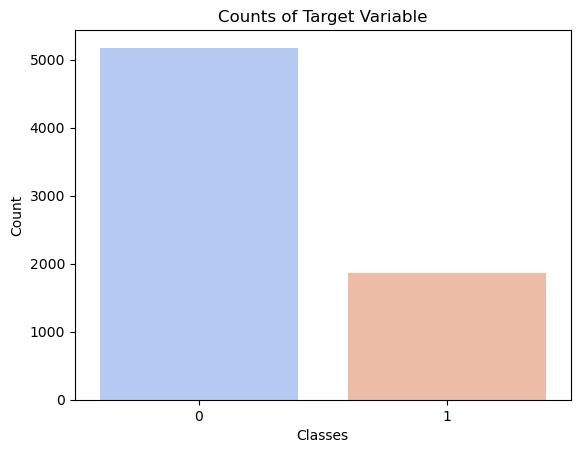

In [124]:
# Bar plot of target class counts

# Groupby object

churn_grp = df.groupby(['Churn Value']).size().reset_index(name='Count')

# Plotting data

sns.barplot(data=churn_grp, x='Churn Value', y='Count', palette="coolwarm")

plt.xlabel('Classes')

plt.title('Counts of Target Variable')

plt.show()

### Churn by gender

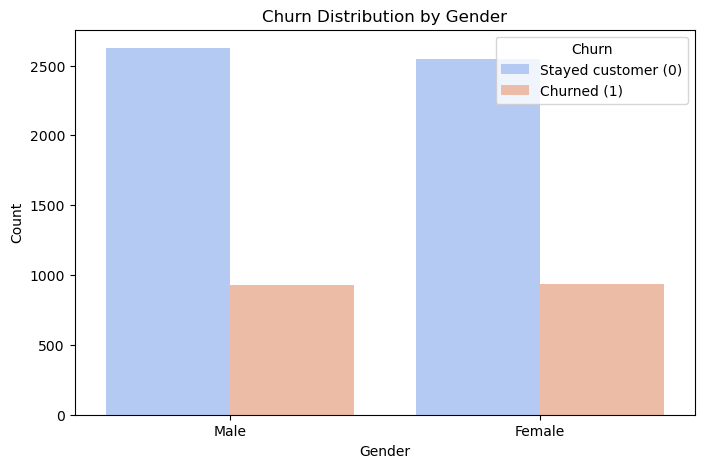

In [95]:
#show the repartion of churn by gender 
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x="Gender", hue="Churn Value", palette="coolwarm")

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Stayed customer (0)", "Churned (1)"])

plt.show()

There are no differences in the churning rate by gender. 

### Churn By Contract type 

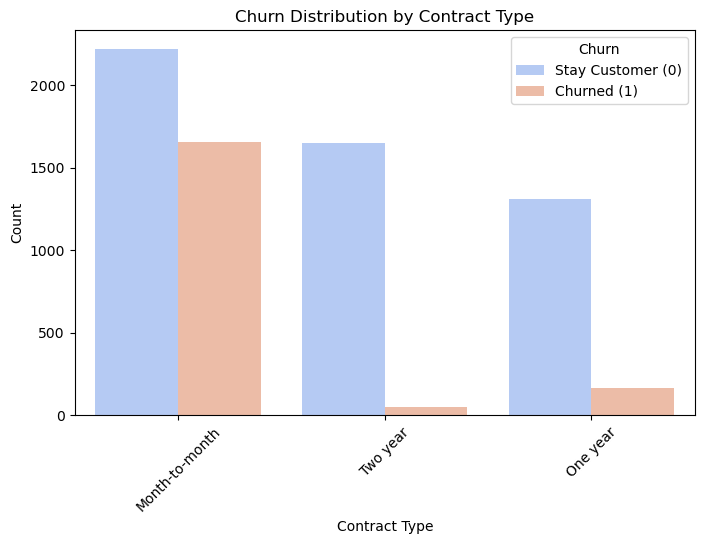

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn Value", palette="coolwarm")
plt.title("Churn Distribution by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Stay Customer (0)", "Churned (1)"])
plt.xticks(rotation=45)
plt.show()

Churn by contract shows a significant churn rate for Month-to-month contract. That's the segment the company should focus on

### Churn by contract type

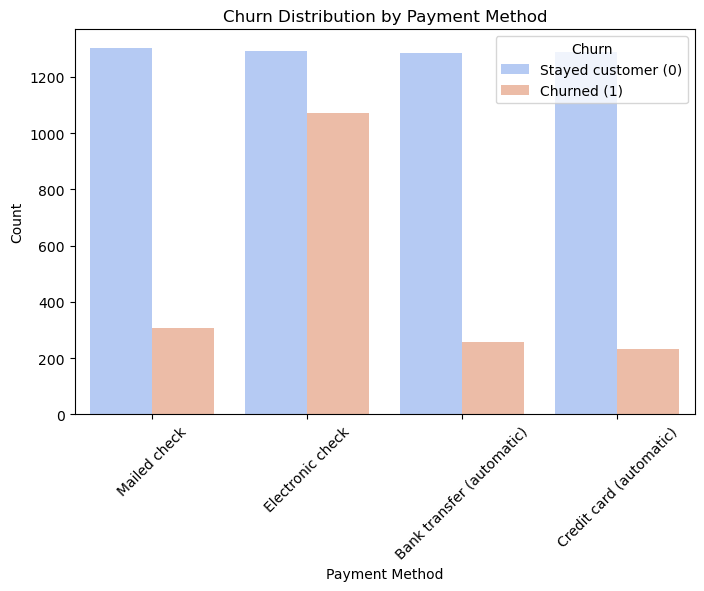

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Payment Method", hue="Churn Value", palette="coolwarm")
plt.title("Churn Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Stayed customer (0)", "Churned (1)"])
plt.xticks(rotation=45)
plt.show()

Customers who pays by 'Elctronic check' have a way hihgher churn rate than other payment methods.

### Churn by monthly charges 

C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186548\4261942928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn Value", y="Monthly Charges", palette="coolwarm")


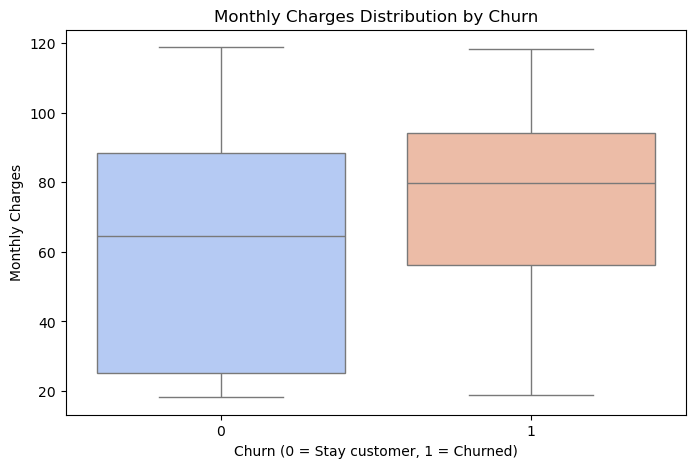

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn Value", y="Monthly Charges", palette="coolwarm")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn (0 = Stay customer, 1 = Churned)")
plt.ylabel("Monthly Charges")
plt.show()

Customer who churn usually pays higher prices than customers who pays lower prices.  

## Data preprocessing

In [101]:
# Convert 'Total Charges' to numeric (coerce errors to NaN)
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')

# Check if there are any missing values after conversion
print(df["Total Charges"].isnull().sum())

11


In [103]:
#we still have 11 missing values
# Impute missing values with the median of the column
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)

print(df["Total Charges"].isnull().sum())

0


C:\Users\REBUILD\AppData\Local\Temp\ipykernel_186548\1119710154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


#### Encoding 

In [97]:
from sklearn.preprocessing import OneHotEncoder

# Dropping nulls, repetitive variables, and unneeded variables

df = df.drop(['Churn Reason', 'Count', 'City', 'Lat Long', 'Latitude', 'Longitude',  
              'Churn Label', 'CustomerID', 'Country', 'Churn Score', 'CLTV', 'Gender', 
             'Multiple Lines', 'Phone Service', 'Streaming TV', 'Streaming Movies', 'State', 'Zip Code'], axis=1)

# Encoding remaining categorical variables

encoder = OneHotEncoder(drop='first', sparse_output = False)

encode_cols = encoder.fit_transform(df[[
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
    'Tech Support', 'Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method']])

new_df = pd.DataFrame(encode_cols, columns= encoder.get_feature_names_out([
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support','Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method', 

]))

df = df.drop(columns=[
    
    'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Contract', 'Senior Citizen', 'Paperless Billing', 'Payment Method'

]).join(new_df)

#### Heatmap to see correlation between features 

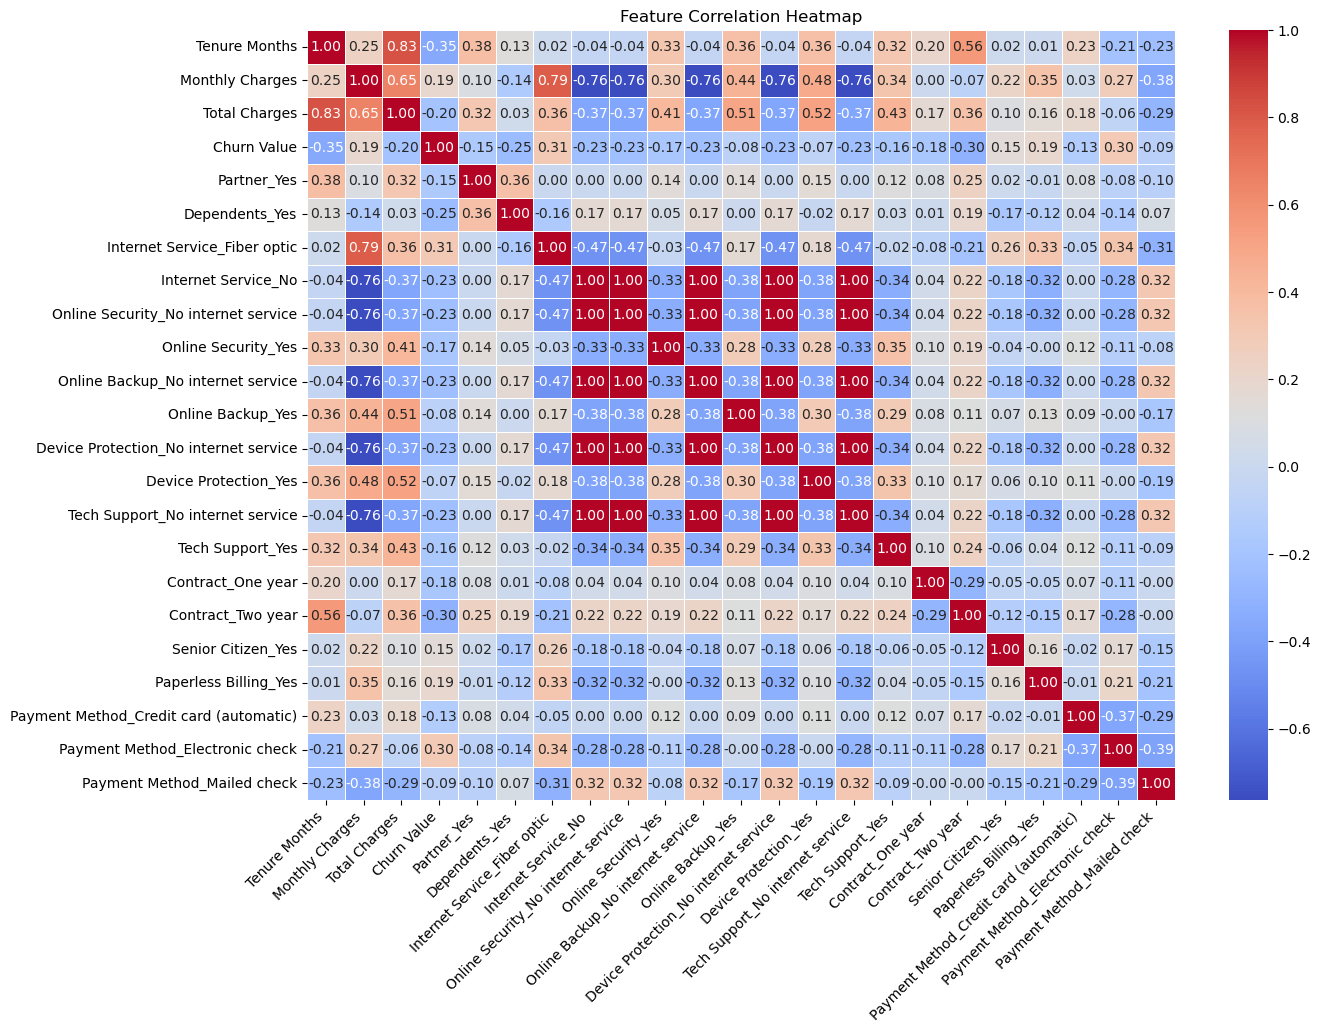

In [105]:
# Increase figure size
plt.figure(figsize=(14, 10))

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate the heatmap with better settings
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)

plt.title("Feature Correlation Heatmap")
plt.show()


In [107]:
#correlation with target 
df.corr(method='pearson')['Churn Value']

Tenure Months                            -0.352229
Monthly Charges                           0.193356
Total Charges                            -0.199037
Churn Value                               1.000000
Partner_Yes                              -0.150448
Dependents_Yes                           -0.248542
Internet Service_Fiber optic              0.308020
Internet Service_No                      -0.227890
Online Security_No internet service      -0.227890
Online Security_Yes                      -0.171226
Online Backup_No internet service        -0.227890
Online Backup_Yes                        -0.082255
Device Protection_No internet service    -0.227890
Device Protection_Yes                    -0.066160
Tech Support_No internet service         -0.227890
Tech Support_Yes                         -0.164674
Contract_One year                        -0.177820
Contract_Two year                        -0.302253
Senior Citizen_Yes                        0.150889
Paperless Billing_Yes          

In [111]:
# Absolute correlation values

df.corr(method='pearson')['Churn Value'].abs().sort_values(ascending=False)

Churn Value                               1.000000
Tenure Months                             0.352229
Internet Service_Fiber optic              0.308020
Contract_Two year                         0.302253
Payment Method_Electronic check           0.301919
Dependents_Yes                            0.248542
Device Protection_No internet service     0.227890
Tech Support_No internet service          0.227890
Online Backup_No internet service         0.227890
Online Security_No internet service       0.227890
Internet Service_No                       0.227890
Total Charges                             0.199037
Monthly Charges                           0.193356
Paperless Billing_Yes                     0.191825
Contract_One year                         0.177820
Online Security_Yes                       0.171226
Tech Support_Yes                          0.164674
Senior Citizen_Yes                        0.150889
Partner_Yes                               0.150448
Payment Method_Credit card (aut

We have some strong Factors influencing the Churn Value :
Tenure Months (-0.352) → Customers with a longer tenure tend to churn less.
-> New customers are at the highest risk of churn. A focus on early retention strategies is crucial.

Internet Service_Fiber optic (0.308) → Fiber optic customers churn more than DSL or those without internet.

Contract_Two year (-0.302) → Customers with longer contracts churn less.
-> Long-term contract could improve the churn rate. 

Payment Method_Electronic check (0.301) → Customers paying via electronic check have the highest churn rate.

Moderate Factors : 
Dependents_Yes (0.248) → Customers with dependents are less likely to churn. 
-> Family-oriented customers may have more stable service needs.

Online Security_No internet service (0.227) → Customers without internet show higher churn, likely because they only use limited services.

Total Charges (0.199) & Monthly Charges (0.193) → Higher spending correlates with higher churn.

Paperless Billing_Yes (0.191) → Customers with paperless billing churn more, possibly due to lower engagement with their billing information.

# SVM Model 

In [163]:
# Separate target

x = df.drop('Churn Value', axis=1)

y = df['Churn Value']


In [165]:
# SMOTE to handle unbalanced classes

smote = SMOTE(sampling_strategy='minority')

x, y= smote.fit_resample(x,y)

In [166]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [168]:
# Scale data to ensure numerical y variables are on the same scale

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [171]:
# Model instance

model = SVC()

In [173]:
# Grid search

param_grid = {'C':[9.4, 9.5],'gamma':['scale','auto'], 'kernel':['linear', 'rbf']}

grid = GridSearchCV(model, param_grid)

In [175]:
# Fitting model 

grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [9.4, 9.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [176]:
# Best params 

grid.best_params_


{'C': 9.5, 'gamma': 'scale', 'kernel': 'rbf'}

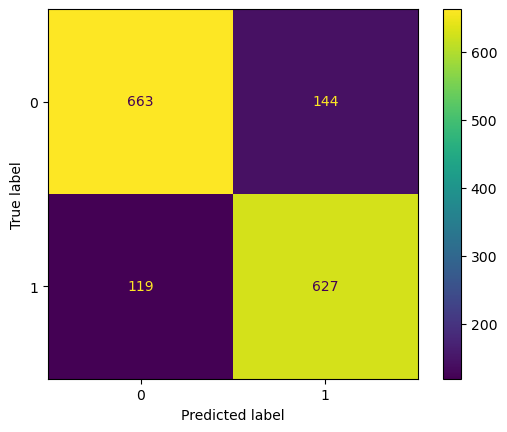

In [177]:
# Confusion matrix

y_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Matrix display

display = ConfusionMatrixDisplay(cm, display_labels= grid.classes_)
display.plot()

plt.show()

In [214]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       807
           1       0.81      0.84      0.83       746

    accuracy                           0.83      1553
   macro avg       0.83      0.83      0.83      1553
weighted avg       0.83      0.83      0.83      1553



In [216]:

# Accuracy score 

accuracy_score(y_test, y_pred)

0.8306503541532517

# Logistic regression model 

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Separate target from features 

X = df.drop(columns=['Churn Value'])  # Featuresset 

y = df['Churn Value']  # Target variable 

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features 
scaler = StandardScaler()
X_train[['Monthly Charges', 'Total Charges', 'Tenure Months']] = scaler.fit_transform(X_train[['Monthly Charges', 'Total Charges', 'Tenure Months']])
X_test[['Monthly Charges', 'Total Charges', 'Tenure Months']] = scaler.transform(X_test[['Monthly Charges', 'Total Charges', 'Tenure Months']])

#### Model training

In [118]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [120]:
# Make predictions on test set
y_pred_log = log_reg.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score, classification_report

#  Evaluate Model Performance
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

 Logistic Regression Accuracy: 0.7984386089425124

 Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



The model correctly classifies ~80% of customers as either churning or staying.

Precision :
0 (No Churn)	0.85 (85%) → Out of all customers predicted as staying, 85% were actually correct.
1 (Churn)	0.64 (64%) → Out of all customers predicted to churn, only 64% actually churned.

Recall:
0 (No Churn)	0.89 (89%) → Out of all actual non-churners, the model correctly identified 89%.
1 (Churn)	0.56 (56%) → Out of all actual churners, the model only found 56% correctly.

f1 socre: 
0 (No Churn)	0.87 → Very strong at predicting non-churners.
1 (Churn)	0.60 → Not as strong for predicting churners.

The model is better at identifying non-churners (Class 0) than churners (Class 1). (Since non-churners represent 71% of our dataset)
The model misses 44% of actual churners (False Negatives). But it correctly identifies 89% of customers who will stay.


#### Find the best parameter 

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define Hyperparameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'class_weight': [None, 'balanced'],  # Handling imbalance
    'solver': ['liblinear', 'lbfgs', 'saga']  # Different solvers
}

#  Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  

#  Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', n_jobs=-1)  # Optimize for recall
grid_search.fit(X_train, y_train)

# Print Best Parameters
print(" Best Parameters for Logistic Regression:", grid_search.best_params_)

# Train Model with Best Parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

# Predict with Optimized Model
y_pred_best_log = best_log_reg.predict(X_test)

# Evaluate New Model
from sklearn.metrics import accuracy_score, classification_report

print(" Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_log))
print("\n Optimized Classification Report:\n", classification_report(y_test, y_pred_best_log))

 Best Parameters for Logistic Regression: {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
 Optimized Logistic Regression Accuracy: 0.7437899219304471

 Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



After tuning :

Precision -> drop to 51% for churn (class 1), but imporve 9% for churn (class 0).

Recall -> improvement went from 56% to 78%. But lowered for non-churn. 

f1 score -> small improvement of 2% for churn and decrease for  non-churn by 6%. 

Overall it's a trade off for anticipating churn customers, but to the expense of a lower accuracy model. 

In [136]:
from sklearn.metrics import roc_auc_score

#  Calculate AUC Score
auc_log = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1])  # Get probability of churn

print(" Logistic Regression AUC Score:", auc_log)

 Logistic Regression AUC Score: 0.8476555839727196


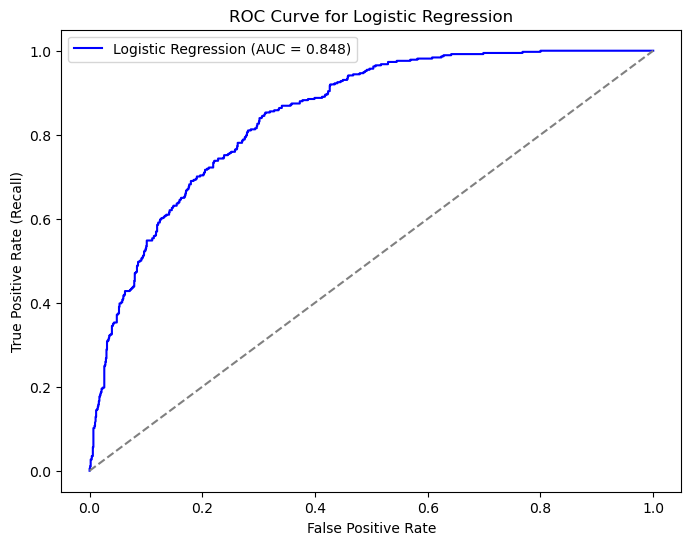

In [138]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#  Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:,1])

#  Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label="Logistic Regression (AUC = {:.3f})".format(auc_log))
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

ROC Curve and AUC Score (0.848) indicate that your Logistic Regression model is performing well at distinguishing churners from non-churners. 

## Random Forest 

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  Train Random Forest Model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Model Performance
print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

 Random Forest Accuracy: 0.7785663591199432

 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [144]:
from sklearn.model_selection import GridSearchCV

#  Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Split sensitivity
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'class_weight': [None, 'balanced']  # Adjusting for imbalanced classes
}

#  Initialize Random Forest Model
rf = RandomForestClassifier(random_state=42)

#  Grid Search with Cross-Validation 
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

#  Print Best Parameters
print(" Best Parameters for Random Forest:", grid_search_rf.best_params_)

#  Train Model with Best Parameters
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

#  Predict with Optimized Model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Optimized Model
print(" Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\n Optimized Classification Report:\n", classification_report(y_test, y_pred_best_rf))

 Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
 Optimized Random Forest Accuracy: 0.7721788502484032

 Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.75      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



After tuning :

Precision -> increase for churn class 0 but decrease slightly for class 1. 

recall -> improve for class 1 going 48% to 75%. 

f1 score -> trade of 2% from class 0 to 11% increase in class 1

In [155]:
# Get predicted probabilities for Class 1 (Churn)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  # Probability of churn

#  Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print AUC Score
print(f" Random Forest AUC Score: {auc_rf:.3f}")


 Random Forest AUC Score: 0.853


Random forest is slightly better than logistic regression

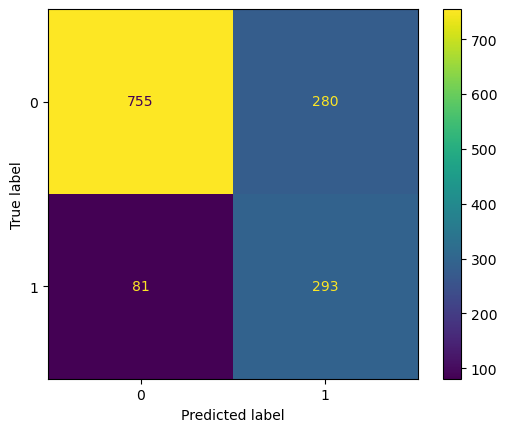

In [157]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid_search.predict(X_test)

# Confusion Matrix 
cm2 = confusion_matrix(y_test, y_pred)

display2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=grid_search.classes_)

display2.plot()


plt.show()

# Final Model Prediction

The SVM model is the better model of all three with a slightly higher accuracy, and given the same x variables which were chosen based on higher correlations with Churn Value.

In [206]:
# Generating a sample 

my_list = [0]*22 + [1]*22  

random.shuffle(my_list)

In [210]:
# Turning sample list into dataframe

df2 = pd.DataFrame(columns=x.columns)

df2.loc[0] = my_list

In [218]:
# Using SVM model to predict sample target value

grid.predict(df2)

C:\Users\REBUILD\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

From this sample, the model predicts the customer is likely to churn.